### The purpose of this tutorial is to walk through the execution of this code, starting with inputs and calculating the displacements and forces on the matrix defined. 

In [106]:
#Import Libraries

import sys
import os
import numpy as np
from src import *
from math_utils import *

### Establish nodes (x, y, z)
Establish elements to establish connectivity in the structure ([node1, node2, E, nu, A, Iz, Iy, Ip, J, z_axis])

Establish support conditions, 
    1 = free DOF, 
    0 = constrained  
    (Node index, x, y, z, z, y, p)

Establish applied forces, must establish for each node (Fx, Fy, Fz, Mx, My, Mz)

In [109]:
node0 = [0, 0, 10]  
node1 = [15, 0, 10]  
node2 = [15, 0, 0]  
nodes = np.array([node0, node1, node2])

element1 = [0, 1, 1000, 0.3, 0.5, 0.041667, 0.010416, 0.16667, 0.02861, [0, 0, 1]]
element2 = [1, 2, 1000, 0.3, 0.5, 0.041667, 0.010416, 0.16667, 0.02861, [1, 0, 0]]
element_connect = np.array([element1, element2], dtype=object)

support_0 = [0, 1, 1, 1, 1, 1, 1]  # [node_id, 1, 1, 1, 1, 1, 1] Fixed Node
support_1 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node
support_2 = [2, 1, 1, 1, 0, 0, 0]  # [node_id, 1, 1, 1, 0, 0, 0] Pinned Node
supports = np.array([support_0, support_1, support_2])

force_applied = np.array([  [  0,   0,    0,   0,   0,   0], 
                            [ 10,   10,    10,   0,   0,   0], 
                            [  0,    0,     0,   0,   0,   0]]) 



### Compute Displacements and Forces

In [110]:
displacement, forces = structure(nodes, element_connect, force_applied, supports)

### Results


In [111]:
print("Displacements: = ", displacement)
print("Forces = ", forces)

Displacements: =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.99779604e-01  2.27445502e+02
  1.99816069e-01 -2.14837401e+01  6.46757581e-03  2.27445502e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.33749552e+01
  4.17331527e-02  2.27445502e+01]
Forces =  [-9.99265348e+00 -8.42397486e+00 -9.19655536e-03  1.57602514e+01
  6.44830806e-02 -1.26359623e+02  1.00000000e+01  1.00000000e+01
  1.00000000e+01  0.00000000e+00  2.77555756e-17  3.19744231e-14
 -7.34652499e-03 -1.57602514e+00 -9.99080344e+00 -2.84217094e-14
  2.77555756e-17  0.00000000e+00]


In [112]:
size = displacement.shape
n = size[0]/6
n = int(n)
reshape = np.reshape(displacement, (n, 6))
x_disp = reshape[:,0]
y_disp = reshape[:,1]
z_disp = reshape[:,2]
print (x_disp)

[0.        0.2997796 0.       ]


[ 0 15 15]


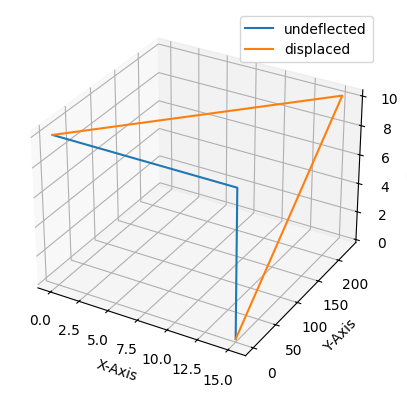

In [113]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
x = nodes [:,0]
x_1 = nodes [:,0] + x_disp
y = nodes [:,1]
y_1 = nodes [:,1] + y_disp
z = nodes [:,2]
z_1 = nodes [:,2] + z_disp
print (x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot (x,y,z, label = 'undeflected')
ax.plot (x_1, y_1, z_1, label='displaced')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
plt.legend()
plt.show()